In [1]:
# Importing necessary libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
# Importing the dataset

In [4]:
fire = pd.read_csv(r"D:\Data science\Assignments docs\SVM\forestfires.csv")
fire.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


In [5]:
# Gathering initial inforamtion of data

In [6]:
fire.shape

(517, 31)

In [7]:
fire.columns

Index(['month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind',
       'rain', 'area', 'dayfri', 'daymon', 'daysat', 'daysun', 'daythu',
       'daytue', 'daywed', 'monthapr', 'monthaug', 'monthdec', 'monthfeb',
       'monthjan', 'monthjul', 'monthjun', 'monthmar', 'monthmay', 'monthnov',
       'monthoct', 'monthsep', 'size_category'],
      dtype='object')

In [8]:
fire.describe()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,...,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292,0.164410,...,0.017408,0.038685,0.003868,0.061896,0.032882,0.104449,0.003868,0.001934,0.029014,0.332689
std,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818,0.371006,...,0.130913,0.193029,0.062137,0.241199,0.178500,0.306138,0.062137,0.043980,0.168007,0.471632
min,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
fire.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

In [10]:
# Dropping "mon" and "day" columns as thier encoded columns are already present

In [11]:
fire = fire.drop(columns=['month', 'day'])
fire.head()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,1,...,0,0,0,0,1,0,0,0,0,small
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,0,...,0,0,0,0,0,0,0,1,0,small
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,0,...,0,0,0,0,0,0,0,1,0,small
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,1,...,0,0,0,0,1,0,0,0,0,small
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,0,...,0,0,0,0,1,0,0,0,0,small


## Exploratory Data Analysis

In [12]:
# Checking the missing values in the dataset

In [13]:
fire.isna().sum()

FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
dayfri           0
daymon           0
daysat           0
daysun           0
daythu           0
daytue           0
daywed           0
monthapr         0
monthaug         0
monthdec         0
monthfeb         0
monthjan         0
monthjul         0
monthjun         0
monthmar         0
monthmay         0
monthnov         0
monthoct         0
monthsep         0
size_category    0
dtype: int64

#### There are no missing values in the datset

In [14]:
# Checking the correlation of the dataset

In [15]:
num_values = fire[['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind','rain', 'area']]

In [16]:
num_values.corr()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
FFMC,1.000000,0.382619,0.330512,0.531805,0.431532,-0.300995,-0.028485,0.056702,0.040122
DMC,0.382619,1.000000,0.682192,0.305128,0.469594,0.073795,-0.105342,0.074790,0.072994
DC,0.330512,0.682192,1.000000,0.229154,0.496208,-0.039192,-0.203466,0.035861,0.049383
ISI,0.531805,0.305128,0.229154,1.000000,0.394287,-0.132517,0.106826,0.067668,0.008258
temp,0.431532,0.469594,0.496208,0.394287,1.000000,-0.527390,-0.227116,0.069491,0.097844
RH,-0.300995,0.073795,-0.039192,-0.132517,-0.527390,1.000000,0.069410,0.099751,-0.075519
wind,-0.028485,-0.105342,-0.203466,0.106826,-0.227116,0.069410,1.000000,0.061119,0.012317
rain,0.056702,0.074790,0.035861,0.067668,0.069491,0.099751,0.061119,1.000000,-0.007366
area,0.040122,0.072994,0.049383,0.008258,0.097844,-0.075519,0.012317,-0.007366,1.000000


#### "DC" and "DMC" have high correlation of 0.68

### Univariate analysis

In [17]:
# Plotting histogram of each column

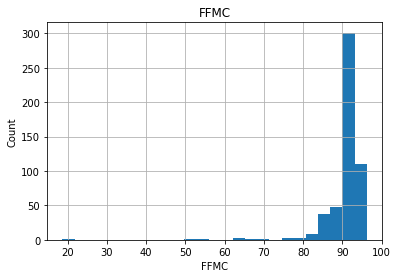

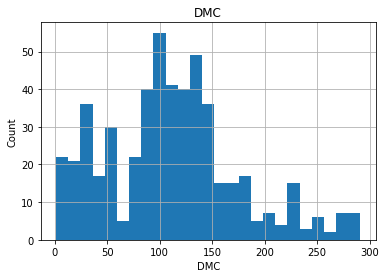

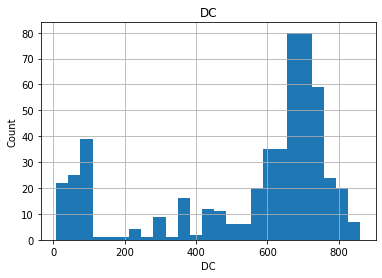

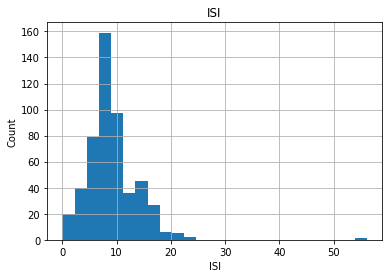

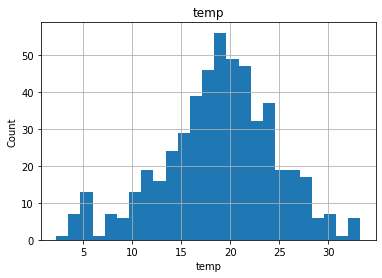

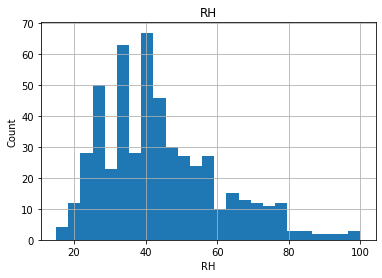

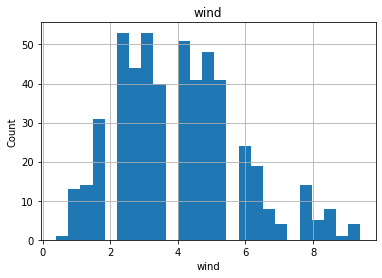

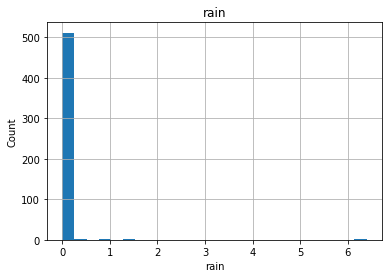

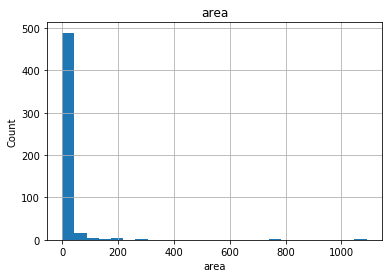

In [18]:
for feature in num_values:
    fire[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

#### Many of the columns are not normally distributed

In [19]:
# Bivariate analysis

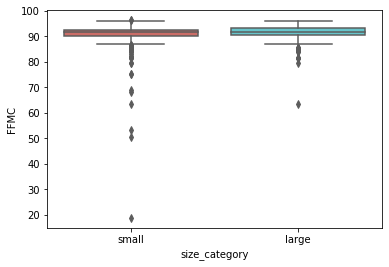

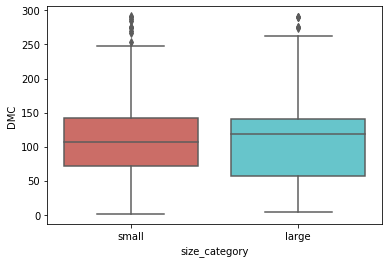

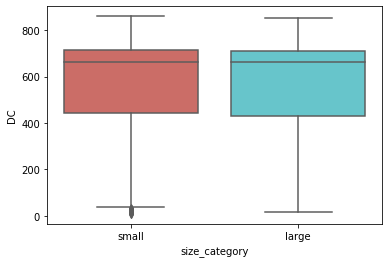

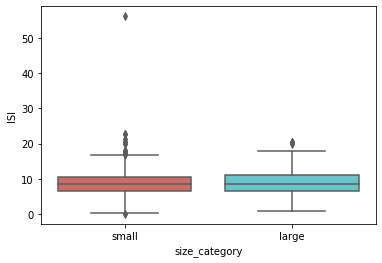

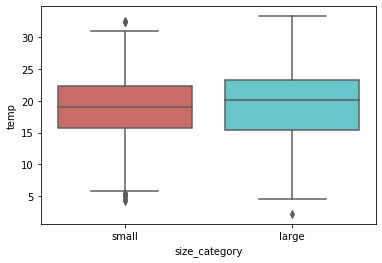

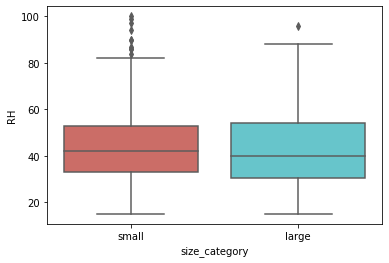

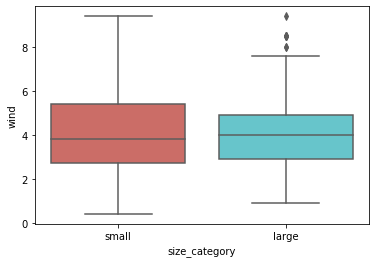

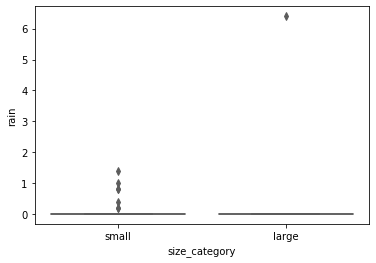

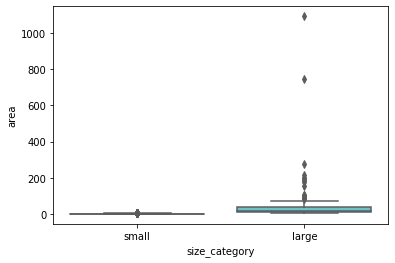

In [20]:
for feature in num_values:
    sns.boxplot("size_category",feature, data=fire, palette='hls')
    plt.show()

#### There is not very considerable change in the categories of target variable with change in input variables

In [21]:
# Count plot of target variable

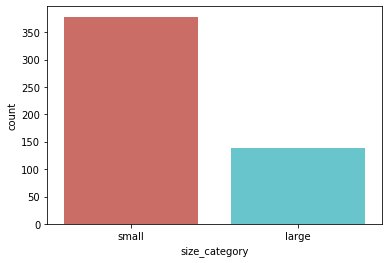

In [22]:
 sns.countplot("size_category", data=fire , palette='hls')

In [23]:
Acceptance_percentage = (len(fire[fire["size_category"]== "large"])/len(fire))*100  

In [24]:
print("Percentage of lare size category:", Acceptance_percentage)

Percentage of lare size category: 26.88588007736944


#### The number of "large" category values are very less compared to "small" category

In [25]:
fire.groupby("size_category").mean()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
size_category,,,,,,,,,,,,,,,,,,,,,
large,90.845324,114.535252,555.879856,8.956115,18.946763,43.071942,4.192086,0.046043,45.495971,0.151079,...,0.057554,0.043165,0.000000,0.064748,0.021583,0.086331,0.007194,0.000000,0.028777,0.366906
small,90.570899,109.525397,545.020370,9.045767,18.867989,44.735450,3.953439,0.012698,0.841561,0.169312,...,0.002646,0.037037,0.005291,0.060847,0.037037,0.111111,0.002646,0.002646,0.029101,0.320106


#### "area", "rain" and "wind" are the important variables which helps to discriminate the "size_category"

In [26]:
# Separate majority and minority classes

In [27]:
fire_majority = fire[fire["size_category"] == "small"]
fire_minority = fire[fire["size_category"] == "large"]

In [28]:
fire_minority.shape

(139, 29)

In [29]:
fire_majority.shape

(378, 29)

### Upsampling the minority class

In [30]:
from sklearn.utils import resample

In [31]:
minority_upsampled = resample(fire_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=378,    # to match majority class
                                 random_state=1)    # reproducible results

In [32]:
# Combine majority class with upsampled minority class

In [33]:
fire_upsampled = pd.concat([fire_majority, minority_upsampled])
fire_upsampled

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,1,...,0,0,0,0,1,0,0,0,0,small
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,0,...,0,0,0,0,0,0,0,1,0,small
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,0,...,0,0,0,0,0,0,0,1,0,small
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,1,...,0,0,0,0,1,0,0,0,0,small
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
321,92.8,119.0,783.5,7.5,16.8,28,4.0,0.0,7.21,0,...,0,0,0,0,0,0,0,0,1,large
212,94.3,85.1,692.3,15.9,20.1,47,4.9,0.0,26.13,1,...,0,0,0,0,0,0,0,0,1,large
191,95.2,131.7,578.8,10.4,24.2,28,2.7,0.0,8.68,0,...,0,0,0,0,0,0,0,0,0,large
278,85.4,25.4,349.7,2.6,4.6,21,8.5,0.0,22.03,0,...,0,0,0,0,0,0,0,0,0,large


In [34]:
# Display new class counts
fire_upsampled.size_category.value_counts()

small    378
large    378
Name: size_category, dtype: int64

In [35]:
# Splitting the data based on independent and dependent variables

In [36]:
X = fire_upsampled.loc[:, fire_upsampled.columns != 'size_category']
Y = fire_upsampled.loc[:, fire_upsampled.columns == 'size_category']

In [37]:
X.shape, Y.shape

((756, 28), (756, 1))

## Feature scaling

In [38]:
from sklearn.preprocessing import MinMaxScaler

In [39]:
scaler=MinMaxScaler()
scaler.fit(X)

MinMaxScaler()

In [40]:
X = pd.DataFrame(scaler.transform(X),columns=X.columns)

#### Dropping the 'month' and 'day' related columns as they are not playing any role in prediction

In [41]:
X = X[['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain', 'area']]

In [42]:
# Splitting the data into training and testing

In [43]:
from sklearn.model_selection import train_test_split

In [44]:
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size= 0.3, random_state=0)

In [45]:
x_train.shape

(529, 9)

In [46]:
x_test.shape

(227, 9)

## Model building

In [47]:
from sklearn.svm import SVC

### Using "linear" kernel

In [48]:
model_linear = SVC(kernel = "linear")
model_linear.fit(x_train,y_train)

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


SVC(kernel='linear')

In [49]:
# Predicting the values

In [50]:
pred_train_linear = model_linear.predict(x_train)       # for train

In [51]:
pred_test_linear = model_linear.predict(x_test)        # for test

In [52]:
# Confusion matrix

In [53]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [54]:
confusion_matrix(y_train, pred_train_linear)          # for train

array([[198,  70],
       [132, 129]], dtype=int64)

In [55]:
confusion_matrix(y_test, pred_test_linear)            # for test

array([[83, 27],
       [78, 39]], dtype=int64)

In [56]:
# Checing the accuracy

In [57]:
acc_train_linear = accuracy_score(y_train, pred_train_linear)           # for train
acc_train_linear

0.6181474480151229

In [58]:
acc_train_linear = accuracy_score(y_test, pred_test_linear)             # for test
acc_train_linear

0.5374449339207048

### Using "poly" kernel

In [59]:
model_poly = SVC(kernel = "poly")
model_poly.fit(x_train,y_train)

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


SVC(kernel='poly')

In [60]:
# Predicting the values

In [61]:
pred_train_poly = model_poly.predict(x_train)       # for train

In [62]:
pred_test_poly = model_poly.predict(x_test)        # for test

In [63]:
# Confusion matrix

In [64]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [65]:
confusion_matrix(y_train, pred_train_poly)          # for train

array([[124, 144],
       [  1, 260]], dtype=int64)

In [66]:
confusion_matrix(y_test, pred_test_poly)            # for test

array([[ 60,  50],
       [  2, 115]], dtype=int64)

In [67]:
# Checking the accuracy

In [68]:
acc_train_poly = accuracy_score(y_train, pred_train_poly)           # for train
acc_train_poly

0.725897920604915

In [69]:
acc_train_poly = accuracy_score(y_test, pred_test_poly)             # for test
acc_train_poly

0.7709251101321586

### Using "rbf" kernel

In [70]:
model_rbf = SVC(kernel = "rbf")
model_rbf.fit(x_train,y_train)

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


SVC()

In [71]:
# Predicting the values

In [72]:
pred_train_rbf = model_rbf.predict(x_train)       # for train

In [73]:
pred_test_rbf = model_rbf.predict(x_test)        # for test

In [74]:
# Confusion matrix

In [75]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [76]:
confusion_matrix(y_train, pred_train_rbf)          # for train

array([[167, 101],
       [ 72, 189]], dtype=int64)

In [77]:
confusion_matrix(y_test, pred_test_rbf)            # for test

array([[77, 33],
       [51, 66]], dtype=int64)

In [78]:
# Checing the accuracy

In [79]:
acc_train_rbf = accuracy_score(y_train, pred_train_rbf)           # for train
acc_train_rbf

0.6729678638941399

In [80]:
acc_train_rbf = accuracy_score(y_test, pred_test_rbf)             # for test
acc_train_rbf

0.6299559471365639

#### Among the three kernels, 'poly' kernel is giving highest accuracy, hence parameter tuning of 'poly' kernel

### Tune parameters

###  Regularization (C)

In [81]:
# With C=1

In [82]:
model_poly = SVC(kernel = "poly", C=1)
model_poly.fit(x_train,y_train)

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


SVC(C=1, kernel='poly')

In [83]:
model_poly.score(x_test, y_test)

0.7709251101321586

In [84]:
# With C = 10

In [85]:
model_poly = SVC(kernel = "poly", C=10)
model_poly.fit(x_train,y_train)

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


SVC(C=10, kernel='poly')

In [86]:
model_poly.score(x_test, y_test)

0.9383259911894273

In [87]:
# Changing the "gamma" value to "auto"

In [88]:
model_poly = SVC(kernel = "poly", C=10, gamma="auto")
model_poly.fit(x_train,y_train)

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


SVC(C=10, gamma='auto', kernel='poly')

In [89]:
model_poly.score(x_test, y_test)

0.5198237885462555

#### There is good improvement in the accuracy of the model with tuning in regularization

#### Hence the best model for the given dataset is SVM model with parameters, 'poly' as kernel and C = 10